# Simple pendulum using Lagrange's equation

Defines a LagrangianPendulum class that is used to generate double pendulum plots from solving Lagrange's equations.

* Last revised 26-Apr-2019 by Richard Mueller (mueller.415@osu.edu).

## Euler-Lagrange equation

For a double pendulum, the kinetic energy is:

$\begin{align}
  T = \frac12 m_1 L_1^2 \dot\phi_1^2 + \frac12 m_2 (L_2^2 \dot\phi_2^2 + L_1^2 \dot\phi_1^2 + 2L_1L_2\dot\phi_1 \dot\phi_2\cos(\phi_1-\phi_2))
\end{align}$

The potential energy:

$\begin{align}
  U = - m_1gL_1(1 - \cos\phi_1) - m_2g(L_1(1 - \cos\phi_1)+ L_2(1 - \cos\phi_2))
\end{align}$

The Lagrangian with generalized coordinates $\phi_i$ is then

$\begin{align}
  \mathcal{L} = T - U = \frac12 (m_1 L_1^2 \dot\phi_1^2 +  m_2(L_2^2 \dot\phi_2^2 + L_1^2 \dot\phi_1^2 + 2L_1L_2\dot\phi_1 \dot\phi_2\cos(\phi_1-\phi_2))) + m_1gL_1(1 - \cos\phi_1) + m_2g(L_1(1 - \cos\phi_1)+ L_2(1 - \cos\phi_2))
\end{align}$

The Euler-Lagrange equation is

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_i} = \frac{\partial\mathcal L}{\partial\phi_i}
\end{align}$
 
 
Taking these derivatives,

$\begin{align}
 \frac{\partial\mathcal L}{\partial\phi_1} = m_1gL_1\sin\phi_1 + m_2gL_2\sin\phi_2 - m_2L_1L_2\sin(\phi_1-\phi_2)
\end{align}$

$\begin{align}
 \frac{\partial\mathcal L}{\partial\phi_1} = m_2gL_2\sin\phi_2 + m_2L_1L_2\sin(\phi_1-\phi_2)
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \ddot\phi_1L_1^2(m_1+m_2) + m_2L_1L_2(\ddot\phi_2\cos(\phi_1-\phi_2) + \dot\phi_2^2\sin(\phi_1-\phi_2)) - \dot\phi_1 \dot\phi_2 \sin(\phi_1 - \phi_2))
\end{align}$

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = m_2\ddot\phi_2L_2^2 + m_2L_1L_2(\ddot\phi_1\cos(\phi_1-\phi_2) + (\dot\phi_1^2 - \dot\phi_1\dot\phi_2)\sin(\phi_1-\phi_2))
\end{align}$


Solving, we find:


$\begin{align}
 \ddot\phi_1 = \frac{1}{m_1 + m_2\sin^2(\phi_1-\phi_2)} (-\sin(\phi_1)(m_1+m_2) + m_2 g \sin(\phi_2) \cos(\phi_1-\phi_2) - m_2 \sin(\phi_1-\phi_2) (L_1 \dot\phi_1^2 \cos(\phi_1-\phi_2) + L_2 \dot\phi_2^2))
\end{align}$

$\begin{align}
 \ddot\phi_2 = \frac{1}{m_1 + m_2\sin^2(\phi_1-\phi_2)} (g(m_1+m_2)(\cos(\phi_1-\phi_2)\sin(\phi_1) - \sin(\phi_2)) + L_1 \dot\phi_1^2 \sin(\phi_1-\phi_2)(m_1 + m_2) + m_2L_2\dot\phi_2^2 \sin(\phi_1-\phi_2)\cos(\phi_1-\phi_2))
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [31]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagranges's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L : float
        length of the pendulum
    g : float
        gravitational acceleration at the earth's surface
    m: float
        mass of a pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., 
                 m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi_1(t) and y[1] = dphi_1/dt
            y[2] = phi_2(t) and y[3] = dphi_2/dt
            
        Returns
        -------
        
        """
        p1, p1d, p2, p2d = y
        
        c, s = np.cos(p1-p2), np.sin(p1-p2)
        denom = (self.m1 + self.m2 * s**2)
        
        p1dd = ( - np.sin(p1)*self.g*(self.m1+self.m2) \
                 + np.sin(p2)*self.g*self.m2*c \
                 - s*self.m2*(self.L1*p1d**2 * c + self.L2*p2d**2) \
                ) / (self.L1*denom)
        
        p2dd = ( self.g*(self.m2 + self.m1)*(c*np.sin(p1) - np.sin(p2)) \
                 + p1d**2 * s*self.L1*(self.m2 + self.m1) \
                 + p2d**2 * s*c*self.L2*self.m2 \
                ) / (self.L2*denom)
                
        phi1_dot = p1d
        phi2_dot = p2d
               
        return phi1_dot, p1dd, phi2_dot, p2dd
    
    def solve_ode(self, t_pts, p1_0, p1d_0, p2_0, p2d_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [p1_0, p1d_0, p2_0, p2d_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        p1, p1d, p2, p2d = solution.y
        
        
        return p1, p1d, p2, p2d

In [32]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [33]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make a double pendulum plot

In [34]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)


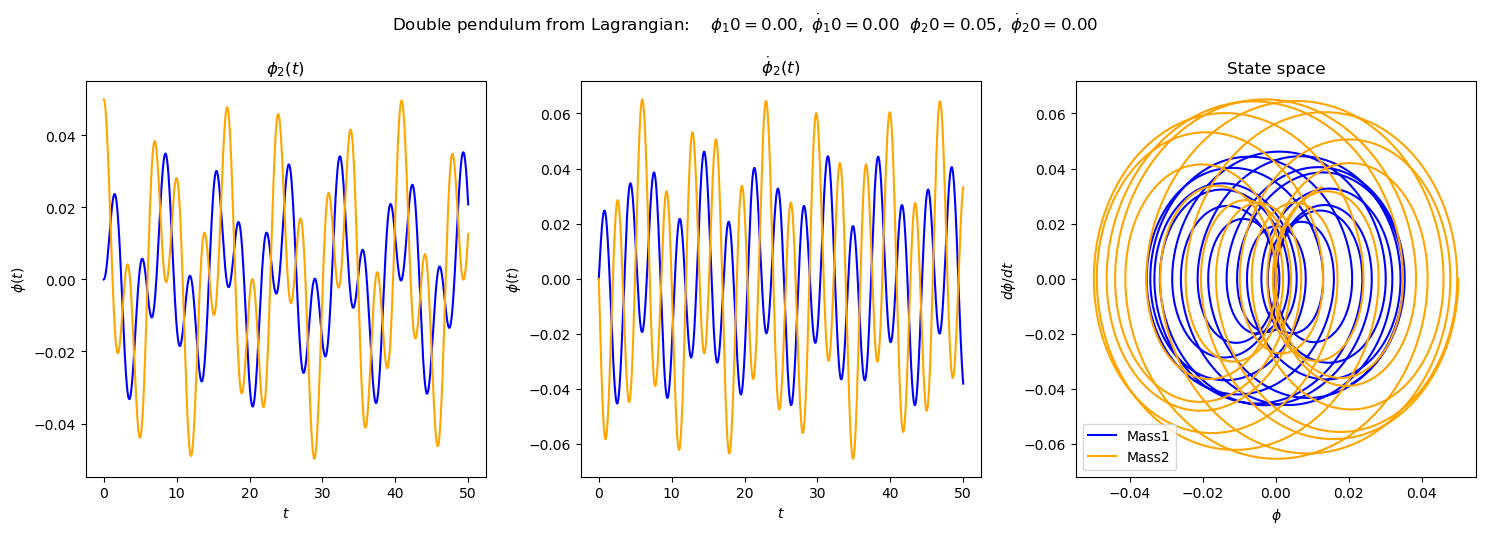

In [35]:
# both pendulums, different initial conditions
phi1_0 = 0.
phi2_0 = 0.05
phi1_dot_0 = 0.
phi2_dot_0 = 0.
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi_{(10)} = {phi1_0:.2f},$' + \
                rf' $\dot\phi_{10} = {phi1_dot_0:.2f}$' + \
                rf'  $\phi_{20} = {phi2_0:.2f},$' + \
                rf' $\dot\phi_{20} = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label='Mass1', 
            title='State space', 
            ax=ax_c) 

##### Start plotting the second mass
# first plot: phi plot 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='orange',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='orange',
            label='Mass2', 
            title='State space', 
            ax=ax_c) 

# Adding one legend should be enough
ax_c.legend()


fig.tight_layout()
fig.savefig('TwoPendulums.png', bbox_inches='tight')  

## Chaos

Here, we plot $\Delta \phi$ and show that for angles outside the small angle approximation, $\Delta \phi$ increases exponentially.

In [9]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 90.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
c1 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)
c2 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)

# One plot for each pendulum for two slightly 
# different initial conditions
phi1_10 = 0.
phi2_10 = np.pi / 4.
phi1_dot_10 = 0.
phi2_dot_10 = 0.
phi1_1, phi1_dot_1, phi2_1, phi2_dot_1 = c1.solve_ode(t_pts, phi1_10, phi1_dot_10, phi2_10, phi2_dot_10)

phi1_20 = 0.
phi2_20 = np.pi / 4. + .01
phi1_dot_20 = 0.
phi2_dot_20 = 0.
phi1_2, phi1_dot_2, phi2_2, phi2_dot_2 = c2.solve_ode(t_pts, phi1_20, phi1_dot_20, phi2_20, phi2_dot_20)

# Calculate the absolute value of \phi_2 - \phi_1
D_phi_1 = np.fabs(phi1_1 - phi1_2)
D_phi_2 = np.fabs(phi2_1 - phi2_2)

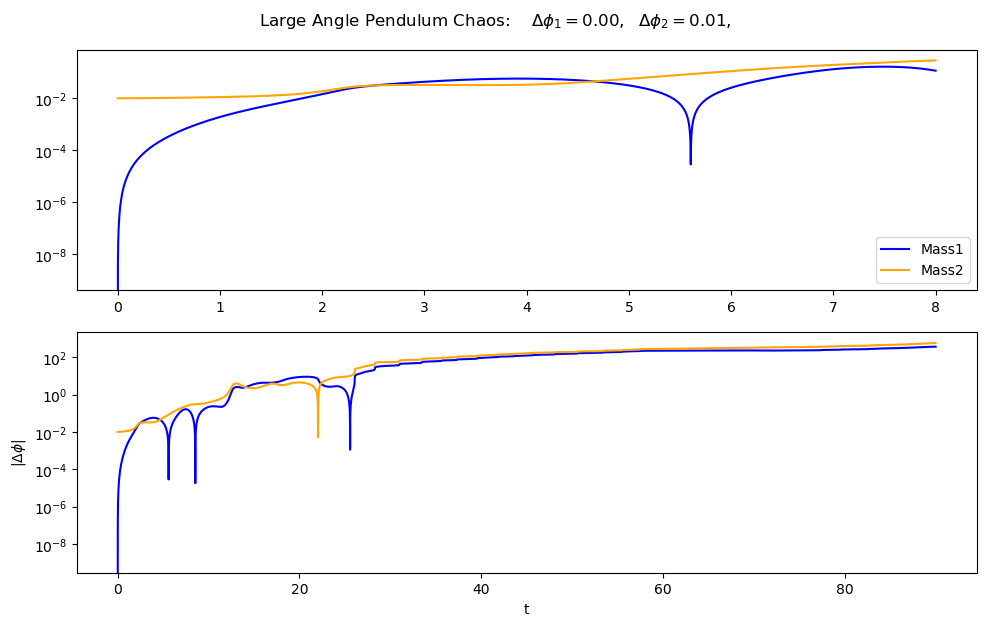

In [10]:
# start the plot!
fig = plt.figure(figsize=(10,6))
overall_title = 'Large Angle Pendulum Chaos:  ' + \
                rf'  $\Delta\phi_1 = {D_phi_1[0]:.2f},$' + \
                rf'  $\Delta\phi_2 = {D_phi_2[0]:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')



    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  
start, stop = start_stop_indices(t_pts, 0., 8.)
ax_a.semilogy(t_pts[start : stop], D_phi_1[start : stop], 
            color='blue', label='Mass1') 
ax_a.semilogy(t_pts[start : stop], D_phi_2[start : stop], 
            color='orange', label='Mass2') 
ax_a.legend()

ax_b = fig.add_subplot(2,1,2)                  
start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], D_phi_1[start : stop], 
            color='blue', label=None, semilogy=True)    
plot_y_vs_x(t_pts[start : stop], D_phi_2[start : stop], 
            color='orange', label=None, semilogy=True)   
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')



                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('Delta_phi.png', bbox_inches='tight')  

## Animation (In Progress)

In [28]:
class AnimationPendulumPlot():
    """
    AnimationPlot class uses matplotlib.animation.FuncAnimation to animate
     the dynamics of an oscillator.  This includes a simple time dependence
     graph, a state space graph with Poincare map, and a physical model.
     
     We'll start with a pendulum and then generalize later.
     
    Parameters
    ----------
    phi_vs_t : boolean
        If True, plot phi(t) vs. t
    
    phi_dot_vs_t : boolean
        If True, plot phi_dot(t) vs. t
    
    state_space : boolean
        If True, plot phi_dot(t) s. phi(t)
    
    physics_pend : boolean
        If True, draw the pendulum at phi(t) vs. t


    Methods
    -------
    plot_setup
    
    t_pts_init
    
    add_pendulum
    
    animate_pendulum
    
    plot_setup
    
    start_animation
    """
    def __init__(self, phi_vs_t=True, phi_dot_vs_t=False,
                 state_space=True, physical_pend=True):
        self.phi1_list = []
        self.phi1_dot_list = []
        self.phi2_list = []
        self.phi2_dot_list = []
        
        self.length = 0.8
        self.line_colors = ['blue', 'red']
        self.pt_colors = ['black', 'brown']
        self.phi_align = ['left', 'right']
                  
    def t_pts_init(self, t_start=0., t_end=100., delta_t=0.01): 
        """Create the array of time points for the full iteration"""
        self.t_start = t_start
        self.t_end = t_end
        self.delta_t = delta_t
        self.t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

    def add_pendulum(self, pend, phi1_0=0., phi1_dot_0=0., phi2_0=0., phi2_dot_0=0.):
        """Add a pendulum to be plotted as a class instance of Pendulum
            along with initial conditions.  So it knows all of the parameters
            as well through the Pendulum class.
        """
        self.pend = pend
        phi1, phi1_dot, phi2, phi2_dot = pend.solve_ode(self.t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)
        self.phi1_list.append(phi1)
        self.phi1_dot_list.append(phi1_dot)
        self.phi2_list.append(phi2)
        self.phi2_dot_list.append(phi2_dot)
    
    def plot_setup(self, plot_start, plot_end):
        """Set up the plots to be displayed. """

            # start the plot!
#         overall_title = 'Parameters:  ' + \
#                         rf' $\omega = {omega_ext:.2f},$' + \
#                         rf' $\gamma = {gamma_ext:.3f},$' + \
#                         rf' $\omega_0 = {omega_0:.2f},$' + \
#                         rf' $\beta = {beta:.2f},$' + \
#                         rf'  $\phi_0 = {phi_0:.2f},$' + \
#                         rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
#                         '\n'     # \n means a new line (adds some space here)
#         self.fig = plt.figure(figsize=(10,3.3), num='Pendulum Plots')
#         self.fig.suptitle(overall_title, va='top')

        # Labels for individual plot axes
        phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
        phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
        state_space_labels = (r'$\phi$', r'$d\phi/dt$')
        
        self.fig = plt.figure(figsize=(10, 3.3), num='Pendulum animation')

        self.ax_1 = self.fig.add_subplot(1,3,1)        
        self.ax_1.set_xlabel(r'$t$')
        self.ax_1.set_ylabel(r'$\phi(t)$')
        self.line_1 = []
        self.pt_1 = []

        self.ax_2 = self.fig.add_subplot(1,3,2, projection='polar')
        self.ax_2.set_aspect(1)   # aspect ratio 1 subplot
        self.ax_2.set_rorigin(0.)   # origin in the middle
        self.ax_2.set_theta_zero_location('S')  # phi=0 at the bottom
        self.ax_2.set_ylim(-1.,1.)  # r goes from 0 to 1
        self.ax_2.grid(False)   # no longitude/lattitude lines
        self.ax_2.set_xticklabels([])   # turn off angle labels
        self.ax_2.set_yticklabels([])    # turn off radial labels
        self.ax_2.spines['polar'].set_visible(False) # no circular border
        self.line_2 = []
        self.pt_2 = []
        self.phi_text = []

        self.ax_3 = self.fig.add_subplot(1,3,3)
        self.ax_3.set_xlabel(r'$\phi$')
        self.ax_3.set_ylabel(r'$\dot\phi$')
        self.line_3 = []
        self.pt_3 = []
        
        self.line_4 = []
        self.line_5 = []
        self.line_6 = []
        
        self.pt_4 = []
        self.pt_5 = []
        self.pt_6 = []
       
        
        # plot new arrays from start to stop
        self.start, self.stop = start_stop_indices(self.t_pts, plot_start, 
                                                   plot_end)
        self.t_pts_plt = self.t_pts[self.start : self.stop]
        self.phi1_plt_list = []
        self.phi1_dot_plt_list = []
        self.phi2_plt_list = []
        self.phi2_dot_plt_list = []
        for i, (phi1, phi1_dot, phi2, phi2_dot) in enumerate(zip(self.phi1_list, 
                                               self.phi1_dot_list, 
                                               self.phi2_list, 
                                               self.phi2_dot_list)):
            phi1_plt = phi1[self.start : self.stop]
            self.phi1_plt_list.append(phi1_plt)
            phi2_plt = phi2[self.start : self.stop]
            self.phi2_plt_list.append(phi2_plt)
            
            phi1_dot_plt = phi1_dot[self.start : self.stop]
            self.phi1_dot_plt_list.append(phi1_dot_plt)
            phi2_dot_plt = phi2_dot[self.start : self.stop]
            self.phi2_dot_plt_list.append(phi2_dot_plt)

            line_1, = self.ax_1.plot(self.t_pts_plt, phi1_plt, 
                                      color=self.line_colors[i])
            line_2, = self.ax_1.plot(self.t_pts_plt, phi2_plt, 
                                      color=self.line_colors[i+1])
            self.line_1.append(line_1)
            self.line_2.append(line_2)
            
            pt_1, = self.ax_1.plot(self.t_pts_plt[0], phi1_plt[0], 
                                    'o', color=self.pt_colors[i])
            pt_2, = self.ax_1.plot(self.t_pts_plt[0], phi2_plt[0], 
                                    'o', color=self.pt_colors[i])
            self.pt_1.append(pt_1)
            self.pt_2.append(pt_2)
        
            self.ax_2.plot(0, 0, color='black', marker='o', markersize=5)
            
            line_3, = self.ax_2.plot([phi1_plt[0], phi1_plt[0]], 
                                      [0.,self.length], 
                                      color=self.line_colors[i], lw=3)
            line_4, = self.ax_2.plot([phi2_plt[0], phi2_plt[0]], 
                                      [0.,self.length], 
                                      color=self.line_colors[i+1], lw=3)
            self.line_3.append(line_3)
            self.line_4.append(line_4)
            
            pt_3, = self.ax_2.plot(phi1_plt[0], self.length, 
                                   marker='o', markersize=15, 
                                   color=self.pt_colors[i])
            pt_4, = self.ax_2.plot(phi2_plt[0], self.length, 
                                   marker='o', markersize=15, 
                                   color=self.pt_colors[i])
            
            self.pt_3.append(pt_3)
            self.pt_4.append(pt_4)
            
            phi1_string = rf'$\phi_1 = {phi1_plt[0]: .1f}$'
            phi2_string = rf'$\phi_2 = {phi2_plt[0]: .1f}$'
            
            phi1_text = self.ax_2.text(np.pi, 1., phi1_string, 
                                   horizontalalignment=self.phi_align[i]) 
            phi2_text = self.ax_2.text(np.pi, 1., phi2_string, 
                                   horizontalalignment=self.phi_align[i])
            
            self.phi_text.append(phi1_text)
            self.phi_text.append(phi2_text)
        
            line_5, = self.ax_3.plot(phi1_plt, phi1_dot_plt, 
                                     color=self.line_colors[i])
            line_6, = self.ax_3.plot(phi2_plt, phi2_dot_plt, 
                                     color=self.line_colors[i+1])
            
            self.line_5.append(line_5)
            self.line_6.append(line_6)
            
            pt_5, = self.ax_3.plot(phi1_plt[0], phi1_dot_plt[0], 
                                    'o', color=self.pt_colors[i])
            pt_6, = self.ax_3.plot(phi2_plt[0], phi2_dot_plt[0], 
                                    'o', color=self.pt_colors[i+1])
            
            self.pt_5.append(pt_5)
            self.pt_6.append(pt_6)
        
        self.fig.tight_layout()
        

    def animate_pendulum(self, i, t_pts_skip, phi_skip_list,
                         phi_dot_skip_list):
        for index, (phi_skip, phi_dot_skip) in \
                     enumerate(zip(phi_skip_list, phi_dot_skip_list)):
            self.pt_1[index].set_data(t_pts_skip[i], phi_skip[i])

            self.line_2[index].set_data([phi_skip[i], phi_skip[i]], 
                                        [0., self.length])
            self.pt_2[index].set_data(phi_skip[i], self.length)
            phi_string = rf'$\phi = {phi_skip[i]: .1f}$  '
            self.phi_text[index].set_text(phi_string)

            self.pt_3[index].set_data(phi_skip[i], phi_dot_skip[i])

        #return self.pt_1, self.pt_2, self.phi_text, self.pt_3
          
        
    def start_animation(self, skip=2, interval=25.):
        self.skip = skip          # skip between points in t_pts array
        self.interval = interval  # time between frames in milliseconds
        
        phi1_skip_list = []
        phi1_dot_skip_list = []
        phi2_skip_list = []
        phi2_dot_skip_list = []
        
        for i, (phi1_plt, phi1_dot_plt,phi1_plt, phi1_dot_plt) \
            in enumerate(zip(self.phi1_plt_list, 
                             self.phi1_dot_plt_list,
                             self.phi2_plt_list,
                             self.phi2_dot_plt_list)):
            
            phi1_skip_list.append(phi1_plt[::self.skip])
            phi1_dot_skip_list.append(phi1_dot_plt[::self.skip])
            phi2_skip_list.append(phi2_plt[::self.skip])
            phi2_dot_skip_list.append(phi2_dot_plt[::self.skip])
                      
        t_pts_skip = self.t_pts_plt[::self.skip]                                   
        self.anim = animation.FuncAnimation(self.fig, self.animate_pendulum, 
                           fargs=(t_pts_skip,
                                  phi1_skip_list, phi1_dot_skip_list,
                                  phi2_skip_list, phi2_dot_skip_list,
                                 ), 
                           init_func=None,
                           frames=len(t_pts_skip), 
                           interval=self.interval, 
                           blit=False, repeat=False,
                           save_count=0)

        #HTML(anim.to_jshtml())
        self.fig.show()


In [29]:
# Create a pendulum animation instance. 
pendulum_anim = AnimationPendulumPlot(phi_vs_t=True, 
                                      state_space=True,
                                      physical_pend=True)

# Common plotting time (generate the full time here then use slices below)
t_start = 0.
t_end = 100.
delta_t = 0.01
pendulum_anim.t_pts_init(t_start, t_end, delta_t)

# Pendulum parameters
L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L1=L1,L2=L2,m1=m1,m2=m2, g=g)

# Initial conditions specified
phi1_0 = 0.0
phi1_dot_0 = 0.0

phi2_0 = 0.05
phi2_dot_0 = 0.0

# Add a pendulum to the animation plots; this solves the differential
#  equation for the full t_pts array, generating phi and phi_dot internally. 
pendulum_anim.add_pendulum(p1, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)

NameError: name 'phi2_plt' is not defined

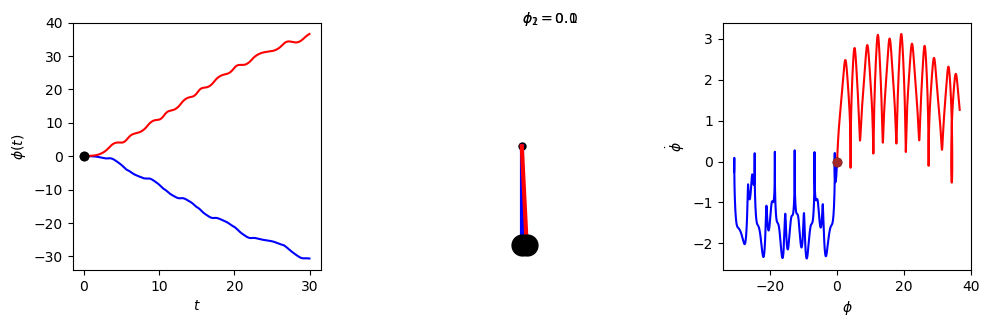

In [30]:
plot_start = 0.   # time to begin plotting
plot_end = 30.    # time to end plotting
pendulum_anim.plot_setup(plot_start, plot_end)

# Start the animation (adjust skip and interval for a smooth plot at a 
#  useful speed)
skip = 2        # skip between time points (in units of delta_t) 
interval = 15.  # time between frames in milliseconds
pendulum_anim.start_animation(skip, interval)